# Homework 1: Language models (50 points)

The first homework focuses on the following skills: being able to work with simple formal exercises on language modeling, on understanding and being able to extract properties and configurations of state-of-the-art language models and, finally, training language models yourself!

### Logistics

* submission deadline: May 15th 23:59 German time via Moodle
  * please upload a **SINGLE ZIP FILE named Surname_FirstName_HW1.zip** containing the .ipynb file of the notebook (if you solve it on Colab, you can go to File > download), the json file for Ex. 2 and a .png or .jpg file with your losses plot from Ex. 3.
* please solve and submit the homework **individually**! 
* if you use Colab, to speed up the execution of the code on Colab (especially Exercise 3), you can use the available GPU (if Colab resources allow). For that, before executing your code, navigate to Runtime > Change runtime type > GPU > Save.

## Exercise 1: Understanding language modeling (12 points)

Please answer the following exercises. Importantly, please reason step by step; i.e., where calculations are required, please provide intermediate steps of how you arrived at your solution. You do not need to write any code, just mathematical solutions.

> 1. [6pts] Consider the corpus $C$ with the following sentences: $C=${"The cat sleeps", "The mouse sings", "The cat sleeps", "A dog sings"}. 
> (a) Define the vocabulary $V$ of this corpus (assuming by-word tokenization).
> (b) Pick one of the four sentences in $C$. Formulate the probability of that sentence in the form of the chain rule. Calculate the probability of each termn in the chain rule, given the corpus.
> 2. [4pts] We want to train a neural network that takes as input two numbers $x_1, x_2$, passes them through three hidden linear layers, each with 13 neurons, each followed by the ReLU activation function, and outputs three numbers $y_1, y_2, y_3$. Write down all weight matrices of this network with their dimensions. (Example: if one weight matrix has the dimensions 3x5, write $M_1\in R^{3\times5}$) 
> 3. [2pts] Consider the sequence: "Input: Some students trained each language model". Assuming that each word+space/punctuation corresponds to one token, consider the following token probabilities of this sequence under some trained language model: $p = [0.67, 0.91, 0.83, 0.40, 0.29, 0.58, 0.75]$. Compute the average surprisal of this sequence under that language model. [Note: in this class we always assume the base $e$ for $log$, unless indicated otherwise. This is also usually the case throughout NLP.]

1.
- what is byword tokenization? V = {the, cat, sleeps, mouse, sings, a, dog}
- p(the cat sings) = p(the) * p(cat | the) * p(sings | the cat)
- single counts/frequencies = {the: 3, cat: 2, sleeps: 2, mouse: 1, sings: 2, a: 1, dog: 1}

2.
- 2 --> 13 --> 13 --> 13 --> 3

3.
- p(some | `<bos>`) = 0.67
- p(students | some) = 0.91
- p(trained | some students) = 0.83
- p(each | some students trained) = 0.40
- p(language | some students trained each) = 0.29
- p(model | some students trained each language) = 0.58
- p(`<eos>` | some students trained each language model) = 0.75

## Exercise 2: Extracting LLM fingerprints (15 points)

For this task, your job is to extract the "fingerprint" of a state-of-the-art large language model from the paper. Specifically, you job is to: 
* find the model that is assigned to your surname in the list **HW1_Model2Group_assignment.csv** (to be found on Moodle under topic 02). Please investigate the latest version of your model, unless the version is specified in the list.
* find out the following charactersitcs of your model 
* submit a json file with your responses in the following format (below is a partial example). 
 
Note that, of course, it might be that some information is not available or that some categories are not applicable. The idea is, that, as a course we can create a fun website which will show a somewhat comprehensive graphical comparison of current language models and their configurations. Based on your collective json files, the lecturers will set up a front end at some point during the class.

**IMPORTANT**: Please email the lecturers by the homework deadline if you DO NOT consent that your json file is used for this idea.

In [1]:
{
    "model_name": "GPT-35",
    "huggingface_model_id": "gpt35",
    "paper_url": "https://arxiv.org/abs/XXX",
    "tokenizer_type": "BPE",
    "vocabulary_size": "XXX",
    "architecture": "Mixture of transformer agents",
    "architecture_type": "decoder only",
    "architecture_quirks": [
        "sparse attention", 
        "...",
    ],
    "parameters": "XXX",
    "finetuning_type": "RLHF",
    "training_data_cutoff": "2050",
    "number_training_tokens": "XXX",
    "pretraining_data_size": "1GB",
    "finetuning_data_size": "XXX",
    "training_data": [
        "Books corpus",
        "Twitter",
        "..."
    ],
    "finetuning_data": [
        "XXX",
        "XXX",
        "..."
    ],
    "access": "open",
    "summary": "A few sentences of what the model claims to be their unique selling point / main contribution"
}

{'model_name': 'GPT-35',
 'huggingface_model_id': 'gpt35',
 'paper_url': 'https://arxiv.org/abs/XXX',
 'tokenizer_type': 'BPE',
 'vocabulary_size': 'XXX',
 'architecture': 'Mixture of transformer agents',
 'architecture_type': 'decoder only',
 'architecture_quirks': ['sparse attention', '...'],
 'parameters': 'XXX',
 'finetuning_type': 'RLHF',
 'training_data_cutoff': '2050',
 'number_training_tokens': 'XXX',
 'pretraining_data_size': '1GB',
 'finetuning_data_size': 'XXX',
 'training_data': ['Books corpus', 'Twitter', '...'],
 'finetuning_data': ['XXX', 'XXX', '...'],
 'access': 'open',
 'summary': 'A few sentences of what the model claims to be their unique selling point / main contribution'}

## Exercise 3: Fine-tuning GPT-2 for QA (23 points)

The learning goal of this exercise is to practice fine-tuning a pretrained LM, GPT-2 small, for a particular task, namely commonsense question answering (QA). We will use a task-specific dataset, [CommonsenseQA](https://huggingface.co/datasets/tau/commonsense_qa), that was introduced by [Talmor et al. (2018)](https://arxiv.org/abs/1811.00937). We will evaluate the performance of the model on our test split of the dataset over training to monitor whether the model's performance is improving and compare the performance of the base pretrained GPT-2 and the fine-tuned model. We will need to perform the following steps: 

1. Prepare data according to steps described in [sheet 1.1](https://cogsciprag.github.io/Understanding-LLMs-course/tutorials/01-introduction.html#main-training-data-processing-steps)
   1. additionally to these steps, prepare a custom Dataset (like in [sheet 2.3](https://cogsciprag.github.io/Understanding-LLMs-course/tutorials/02c-MLP-pytorch.html#preparing-the-training-data)) that massages the dataset from the format that it is shipped in on HuggingFace into strings that can be used for training. Some of the procesing steps will happen in the Dataset.
2. Load the pretrained GPT-2 model
3. Set up training pipeline according to steps described in [sheet 2.5]()
4. Run the training while tracking the losses
5. Save plot of losses for submission

Your tasks:
> 1. [19pts] Complete the code in the spots where there is a comment "#### YOUR CODE HERE ####". There are instructions in the comments as to what the code should implement. With you completed code, you should be able to let the training run without errors. Note that the point of the exercise is the implementation; we should not necessarily expect great performance of the fine-tuned model (and the actual performance will *not* be graded). Often there are several correct ways of implementing something. Anything that is correct will be accepted.
> 2. [4pts] Answer questions at the end of the execise.

In [2]:
# note: if you are on Colab, you might need to install some requirements
# as we did in Sheet 1.1. Otherwise, don't forget to activate your local environment

from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, GPT2Tokenizer, GPT2LMHeadModel
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

/Users/swagatam/miniconda3/envs/ullm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# additioanlly, we need to install accelerate
# uncomment and run the following line on Colab or in your environment
# !pip install accelerate
# NOTE: in a notebook, reloading of the kernel might be required after installation if you get dependency errors with the transformers package

In [4]:
### 1. Prepare data with data prepping steps from sheet 1.1

# a. Acquiring data
# b. (minimally) exploring dataset
# c. cleaning / wrangling data (combines step 4 from sheet 1.1 and step 1.1 above)
# d. splitting data into training and test set (we will not do any hyperparam tuning) 
# (we don't need further training set wrangling)
# e. tokenizing data and making sure it can be batched (i.e., conversted into 2d tensors)
# this will also happen in our custom Dataset class (common practice when working with text data)

In [5]:
# downaload dataset from HF
dataset = load_dataset("tau/commonsense_qa")

In [11]:
# inspect dataset
print(dataset.keys())
# print a sample from the dataset
### YOUR CODE HERE ####
print(f'\none sample from train split --- {dataset["train"][0]}\n---')
print(f'one sample from validation split --- {dataset["validation"][0]}\n---')
print(f'one sample from the test split --- {dataset["test"][0]}')

dict_keys(['train', 'validation', 'test'])

one sample from train split --- {'id': '075e483d21c29a511267ef62bedc0461', 'question': 'The sanctions against the school were a punishing blow, and they seemed to what the efforts the school had made to change?', 'question_concept': 'punishing', 'choices': {'label': ['A', 'B', 'C', 'D', 'E'], 'text': ['ignore', 'enforce', 'authoritarian', 'yell at', 'avoid']}, 'answerKey': 'A'}
---
one sample from validation split --- {'id': '1afa02df02c908a558b4036e80242fac', 'question': 'A revolving door is convenient for two direction travel, but it also serves as a security measure at a what?', 'question_concept': 'revolving door', 'choices': {'label': ['A', 'B', 'C', 'D', 'E'], 'text': ['bank', 'library', 'department store', 'mall', 'new york']}, 'answerKey': 'A'}
---
one sample from the test split --- {'id': '90b30172e645ff91f7171a048582eb8b', 'question': 'The townhouse was a hard sell for the realtor, it was right next to a high rise what?', 'question_

Note that the test split does not have ground truth answer labels. Therefore, **we will use the validation split as our test split**.

In [12]:
# load tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
# set padding side to be left because we are doing causal LM
tokenizer.padding_side = "left"

In [13]:
def massage_input_text(example):
    """
    Helper for converting input examples which have 
    a separate qquestion, labels, answer options
    into a single string.

    Arguments
    ---------
    example: dict
        Sample input from the dataset which contains the 
        question, answer labels (e.g. A, B, C, D),
        the answer options for the question, and which 
        of the answers is correct.
    
    Returns
    -------
    input_text: str
        Formatted training text which contains the question,
        the forwatted answer options (e.g., 'A. <option 1> B. <option 2>' etc)
        and the ground truth answer.
    """
    # combine each label with its corresponding text
    answer_options_list = list(zip(
        example["choices"]["label"],
        example["choices"]["text"]
    ))
    # join each label and text with . and space
    answer_options = ['. '.join(y) for y in answer_options_list] ### YOUR CODE HERE ####
    # join the list of options with spaces into single string
    answer_options_string = ' '.join(answer_options) ### YOUR CODE HERE ####
    # combine question and answer options
    input_text = example["question"] + " " + answer_options_string
    # append the true answer with a new line, "Answer: " and the label
    input_text += "\nAnswer: " + example["answerKey"]

    return input_text

# process input texts of train and test sets
massaged_datasets = dataset.map(
    lambda example: {
        "text": massage_input_text(example)
    }
)

In [14]:
# inspect a sample from our preprocessed data
massaged_datasets["train"][0]

{'id': '075e483d21c29a511267ef62bedc0461',
 'question': 'The sanctions against the school were a punishing blow, and they seemed to what the efforts the school had made to change?',
 'question_concept': 'punishing',
 'choices': {'label': ['A', 'B', 'C', 'D', 'E'],
  'text': ['ignore', 'enforce', 'authoritarian', 'yell at', 'avoid']},
 'answerKey': 'A',
 'text': 'The sanctions against the school were a punishing blow, and they seemed to what the efforts the school had made to change? A. ignore B. enforce C. authoritarian D. yell at E. avoid\nAnswer: A'}

In [15]:
massaged_datasets["validation"][0], massaged_datasets["test"][0]

({'id': '1afa02df02c908a558b4036e80242fac',
  'question': 'A revolving door is convenient for two direction travel, but it also serves as a security measure at a what?',
  'question_concept': 'revolving door',
  'choices': {'label': ['A', 'B', 'C', 'D', 'E'],
   'text': ['bank', 'library', 'department store', 'mall', 'new york']},
  'answerKey': 'A',
  'text': 'A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york\nAnswer: A'},
 {'id': '90b30172e645ff91f7171a048582eb8b',
  'question': 'The townhouse was a hard sell for the realtor, it was right next to a high rise what?',
  'question_concept': 'townhouse',
  'choices': {'label': ['A', 'B', 'C', 'D', 'E'],
   'text': ['suburban development',
    'apartment building',
    'bus stop',
    'michigan',
    'suburbs']},
  'answerKey': '',
  'text': 'The townhouse was a hard sell for the realtor, it was right next to a high rise w

In [16]:
class CommonsenseQADataset(Dataset):
    """
    Custom dataset class for CommonsenseQA dataset.
    """

    def __init__(
            self, 
            train_split, 
            test_split,
            tokenizer,
            max_length=64,
            dataset_split="train",
        ) -> None:
        """
        Initialize the dataset object.
        
        Arguments
        ---------
        train_split: dict
            Training data dictionary with different columns.
        test_split: dict
            Test data dictionary with different columns.
        tokenizer: Tokenizer
            Initialized tokenizer for processing samples.
        max_length: int
            Maximal length of inputs. All inputs will be 
            truncated or padded to this length.
        dataset_split: str
            Specifies which split of the dataset to use. 
            Default is "train".
        """
        self.train_split = train_split['text']
        self.test_split = test_split['text']
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.dataset_split = dataset_split

    def __len__(self):
        """
        Method returning the length of the training dataset.
        """
        
        if self.dataset_split == "train":
            return len(self.train_split) ### YOUR CODE HERE ####
        return len(self.test_split)
    
    def __getitem__(self, idx):
        """
        Method returning a single training example.
        Note that it also tokenizes, truncates or pads the input text.
        Further, it creates a mask tensor for the input text which 
        is used for causal masking in the transformer model.

        Arguments
        ---------
        idx: int
            Index of training sample to be retrieved from the data.
        
        Returns
        --------
        tokenized_input: dict
            Dictionary with input_ids (torch.Tensor) and an attention_mask
            (torch.Tensor).
        """
        # retrieve a training sample at the specified index idx
        # HINT: note that this might depend on self.dataset_split
        if self.dataset_split == "train":
            input_text = self.train_split[idx]
        elif self.dataset_split == "test":
            input_text = self.test_split[idx] ### YOUR CODE HERE ####
        
        tokenized_input = self.tokenizer(
            input_text,
            max_length=self.max_length, ### YOUR CODE HERE ####
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        tokenized_input["attention_mask"] = (tokenized_input["input_ids"] != tokenizer.pad_token_id).long()
        return tokenized_input

In [17]:
# move to accelerated device 
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Device: {device}")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f"Device: {device}")
else:
    device = torch.device("cpu")
    print(f"Device: {device}")


Device: mps


In [18]:
# 2. init model

# load pretrained gpt2 for HF
model = GPT2LMHeadModel.from_pretrained("gpt2").to(device) ### YOUR CODE HERE ####
# print num of trainable parameters
model_size = sum(t.numel() for t in model.parameters())
print(f"GPT-2 size: {model_size/1000**2:.1f}M parameters")

GPT-2 size: 124.4M parameters


Hint: If you run out of memory while trying to run the training, try decreasing the batch size.

In [19]:
# 3. set up configurations required for the training loop

# instantiate dataset with the downloaded commonsense_qa data 
train_dataset = CommonsenseQADataset(
    ### YOUR CODE HERE ####
    massaged_datasets["train"],
    massaged_datasets["validation"],
    tokenizer,
)
# instantiate test dataset with the downloaded commonsense_qa data
test_dataset = CommonsenseQADataset(
    ### YOUR CODE HERE ####,
    massaged_datasets["train"],
    massaged_datasets["validation"],
    tokenizer,
    dataset_split="test"
)
# create a DataLoader for the dataset
# the data loader will automatically batch the data
# and iteratively return training examples (question answer pairs) in batches
dataloader = DataLoader(
    train_dataset, 
    batch_size=32, 
    shuffle=True
)
# create a DataLoader for the test dataset
# reason for separate data loader is that we want to
# be able to use a different index for retreiving the test batches
# we might also want to use a different batch size etc.
test_dataloader = DataLoader(
    test_dataset, 
    batch_size=32, 
    shuffle=True
)

### Debug: inspection of a batch

In [20]:
batch = next(iter(test_dataloader))
batch.keys(), batch['input_ids'].shape, batch['attention_mask'].shape

(dict_keys(['input_ids', 'attention_mask']),
 torch.Size([32, 1, 64]),
 torch.Size([32, 1, 64]))

In [21]:
inputs = batch['input_ids'].squeeze(1)
inputs.shape

torch.Size([32, 64])

In [27]:
print(tokenizer.decode(inputs[0]))
print(tokenizer.decode(inputs[1]))
print(tokenizer.decode(inputs[2]))

<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>John felt a snake slither over him as he rested.  He was afraid to raise his covers for fear of startling it.  Where might he be? A. pet shops B. oklahoma C. basement D. bedroom E. dreams
Answer: D
<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>What is a person trying to accomplish when taking analgesics? A. acceptance B. avoid pain C. acknowledgment D. passing grade E. intellectual challenge
Answer: B
<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|en

In [33]:
tokenizer.decode(inputs[:, -1])  # the last token in each batch is the answer key

' D B A B C E C B D E B A E C E D C E A B E B D A A E A B B B A B'

In [29]:
tokenizer.vocab_size

50257

For each batch of `inputs` of shape [B=32, T=64], the prediction `logits` are of shape [B=T, T=64, C=50257]. How to interpret this?
---
Take a particular string in the input batch, say, `x[b]` which is a vector of size `T`, now for this vector, we want to predict another vector of size `T` that contains the next token predictions for the sequence `x[b, {0,1,2,...,t-1}]` (or simply `x[b, :t]`). Written more clearly (assuming a zero-based indexing):

```
x[b, {0}] should predict x[b, 1]
x[b, {0, 1}] should predict x[b, 2]
...
x[b, {0, 1, ..., T-2}] should predict x[b, T-1] (this is what we want, to predict the last token which is the answer key!)
```
and this is the reason behind shifting the inputs and targets for loss calculation earlier, we want to end inputs early (till `T-2`-th token), and the target is the same input array but starting from `1` to `T-1`, note that both these have now size `T-1`.

Now coming to `logits` it is a tensor of shape [B, T, C] when the input had been `x` of shape [B, T].
`logits[b, t, ...]` is a distribution over the next `(t+1)`-th predicted token for the sequence `x[b, {0, 1, ..., t}]`, so note that here `t` starts from 1 and goes till `T-1`, i.e.,
```
logits[b, 0, ...] ---> uses the sequence x[b, {0}] and is a distribution to predict x[b, 1] (target: x[b, 1])
logits[b, 1, ...] ---> uses the sequence x[b, {0, 1}] and is a distribution to predict x[b, 2] (target: x[b, 2])


logits[b, T-2, ...] --> uses the sequence x[b, {0, 1, ..., T-2}] and is a distribution to predict x[b, T-1] (target: x[b, T-1])
```
The last one is what we need here to predict the "answer key token" in order to answer the multiple choice question!


In [34]:
logits[:, -2, :].shape

NameError: name 'logits' is not defined

In [52]:
# 4. run the training of the model
# Hint: for implementing the forward pass and loss computation, carefully look at the exercise sheets 
# and the links to examples in HF tutorials.

# put the model in training mode
model.train()
# move the model to the device (e.g. GPU)
model = model.to(device)

# trianing configutations 
# feel free to play around with these
epochs  = 5
train_steps =  len(train_dataset) // 32
print("Number of training steps: ", train_steps)
# number of test steps to perform every 10 training steps
# (smaller that the entore test split for reasons of comp. time)
num_test_steps = len(test_dataset) // 32 # 5

# define optimizer and learning rate
optimizer = torch.optim.AdamW(model.parameters(),
                              lr=1e-4,
                              # lr=5e-4  # given
                             ) 
# define some variables to accumulate the losses
losses = []
test_losses = []

# iterate over epochs
for e in range(epochs):
    # iterate over training steps
    for i in tqdm(range(train_steps)):
        # get a batch of data
        x = next(iter(dataloader))
        # move the data to the device (GPU)
        x = x.to(device) ### YOUR CODE HERE ####
        
        # forward pass through the model
        ### YOUR CODE HERE ###
        x['input_ids'] = x['input_ids'].squeeze(1)
        x['attention_mask'] = x['attention_mask'].squeeze(1)
        outputs = model(
            ### YOUR CODE HERE ####
            **x
        )
        # get the loss
        logits = outputs.logits
        targets = x['input_ids']
        # print(logits.shape, targets.shape)
        B, T, C = logits.shape
        loss = torch.nn.CrossEntropyLoss()(logits[:, -2, :], targets[:, -1]) ### YOUR CODE HERE ####
        # backward pass
        ### YOUR CODE HERE ####
        loss.backward()
        losses.append(loss.item())
        # update the parameters of the model
        ### YOUR CODE HERE ###
        optimizer.step()

        # zero out gradient for next step
        optimizer.zero_grad()
        ### YOUR CODE HERE ####

        # evaluate on test set every 10 steps
        if i % 10 == 0:
            print(f"Epoch {e}, step {i}, loss {loss.item()}")
            # track test loss for the evaluation iteration
            test_loss = 0
            for j in range(num_test_steps):
                # get test batch
                x_test = next(iter(test_dataloader))
                x_test = x_test.to(device)
                x_test['input_ids'] = x_test['input_ids'].squeeze(1)
                x_test['attention_mask'] = x_test['attention_mask'].squeeze(1)
                with torch.no_grad():
                    test_outputs = model(
                        ### YOUR CODE HERE ####
                        **x_test
                    )
                    logits = test_outputs.logits
                test_loss += torch.nn.CrossEntropyLoss()(logits[:, -2, :], x_test['input_ids'][:, -1]) ### YOUR CODE HERE ####
                
            test_losses.append(test_loss.item() / num_test_steps)
            print("Test loss: ", test_loss.item() / num_test_steps)

Number of training steps:  304


  0%|                                                   | 0/304 [00:00<?, ?it/s]

Epoch 0, step 0, loss 9.065896987915039


  0%|▏                                          | 1/304 [00:07<38:04,  7.54s/it]

Test loss:  2.854055304276316


  3%|█▍                                        | 10/304 [00:13<03:48,  1.29it/s]

Epoch 0, step 10, loss 4.208332538604736


  4%|█▌                                        | 11/304 [00:20<13:18,  2.72s/it]

Test loss:  3.8029660676655017


  7%|██▊                                       | 20/304 [00:26<03:39,  1.30it/s]

Epoch 0, step 20, loss 2.8328192234039307


  7%|██▉                                       | 21/304 [00:34<12:39,  2.68s/it]

Test loss:  2.7756745187859786


 10%|████▏                                     | 30/304 [00:40<03:31,  1.30it/s]

Epoch 0, step 30, loss 2.5781283378601074


 10%|████▎                                     | 31/304 [00:47<12:12,  2.68s/it]

Test loss:  2.530953055933902


 13%|█████▌                                    | 40/304 [00:53<03:23,  1.29it/s]

Epoch 0, step 40, loss 3.550156354904175


 13%|█████▋                                    | 41/304 [01:00<11:45,  2.68s/it]

Test loss:  3.745102731805099


 16%|██████▉                                   | 50/304 [01:06<03:16,  1.30it/s]

Epoch 0, step 50, loss 6.536445617675781


 17%|███████                                   | 51/304 [01:13<11:18,  2.68s/it]

Test loss:  6.5148255197625415


 20%|████████▎                                 | 60/304 [01:20<03:08,  1.30it/s]

Epoch 0, step 60, loss 7.074066162109375


 20%|████████▍                                 | 61/304 [01:27<10:52,  2.68s/it]

Test loss:  6.995515522203948


 23%|█████████▋                                | 70/304 [01:33<03:00,  1.30it/s]

Epoch 0, step 70, loss 6.515141487121582


 23%|█████████▊                                | 71/304 [01:40<10:25,  2.69s/it]

Test loss:  6.2675018310546875


 26%|███████████                               | 80/304 [01:46<02:52,  1.30it/s]

Epoch 0, step 80, loss 4.461433410644531


 27%|███████████▏                              | 81/304 [01:53<09:58,  2.68s/it]

Test loss:  4.23367630807977


 30%|████████████▍                             | 90/304 [02:00<02:45,  1.30it/s]

Epoch 0, step 90, loss 4.030191421508789


 30%|████████████▌                             | 91/304 [02:07<09:32,  2.69s/it]

Test loss:  4.1767835115131575


 33%|█████████████▍                           | 100/304 [02:13<02:37,  1.30it/s]

Epoch 0, step 100, loss 3.5569541454315186


 33%|█████████████▌                           | 101/304 [02:20<09:07,  2.70s/it]

Test loss:  3.5382184480365955


 36%|██████████████▊                          | 110/304 [02:26<02:30,  1.29it/s]

Epoch 0, step 110, loss 2.939023017883301


 37%|██████████████▉                          | 111/304 [02:33<08:42,  2.71s/it]

Test loss:  3.070829291092722


 39%|████████████████▏                        | 120/304 [02:40<02:19,  1.32it/s]

Epoch 0, step 120, loss 2.552502155303955


 40%|████████████████▎                        | 121/304 [02:47<08:08,  2.67s/it]

Test loss:  2.6776233472322164


 43%|█████████████████▌                       | 130/304 [02:53<02:14,  1.29it/s]

Epoch 0, step 130, loss 2.4145028591156006


 43%|█████████████████▋                       | 131/304 [03:00<07:52,  2.73s/it]

Test loss:  2.5102759913394324


 46%|██████████████████▉                      | 140/304 [03:07<02:07,  1.29it/s]

Epoch 0, step 140, loss 2.4362730979919434


 46%|███████████████████                      | 141/304 [03:14<07:18,  2.69s/it]

Test loss:  2.3634699771278784


 49%|████████████████████▏                    | 150/304 [03:20<01:59,  1.29it/s]

Epoch 0, step 150, loss 1.9369995594024658


 50%|████████████████████▎                    | 151/304 [03:27<06:50,  2.68s/it]

Test loss:  2.120871292917352


 53%|█████████████████████▌                   | 160/304 [03:33<01:51,  1.29it/s]

Epoch 0, step 160, loss 1.9243290424346924


 53%|█████████████████████▋                   | 161/304 [03:40<06:24,  2.69s/it]

Test loss:  2.108839938515111


 56%|██████████████████████▉                  | 170/304 [03:47<01:43,  1.29it/s]

Epoch 0, step 170, loss 2.0532121658325195


 56%|███████████████████████                  | 171/304 [03:54<05:58,  2.69s/it]

Test loss:  1.941925048828125


 59%|████████████████████████▎                | 180/304 [04:00<01:36,  1.29it/s]

Epoch 0, step 180, loss 1.8508248329162598


 60%|████████████████████████▍                | 181/304 [04:07<05:30,  2.69s/it]

Test loss:  1.8905988994397616


 62%|█████████████████████████▋               | 190/304 [04:14<01:28,  1.29it/s]

Epoch 0, step 190, loss 1.7239766120910645


 63%|█████████████████████████▊               | 191/304 [04:21<05:03,  2.69s/it]

Test loss:  1.8733924062628495


 66%|██████████████████████████▉              | 200/304 [04:27<01:20,  1.29it/s]

Epoch 0, step 200, loss 1.8886010646820068


 66%|███████████████████████████              | 201/304 [04:34<04:36,  2.69s/it]

Test loss:  1.840222810444079


 69%|████████████████████████████▎            | 210/304 [04:40<01:12,  1.29it/s]

Epoch 0, step 210, loss 1.7919058799743652


 69%|████████████████████████████▍            | 211/304 [04:47<04:10,  2.69s/it]

Test loss:  1.805915631745991


 72%|█████████████████████████████▋           | 220/304 [04:54<01:05,  1.29it/s]

Epoch 0, step 220, loss 1.8437174558639526


 73%|█████████████████████████████▊           | 221/304 [05:01<03:42,  2.69s/it]

Test loss:  1.7943470603541325


 76%|███████████████████████████████          | 230/304 [05:07<00:57,  1.29it/s]

Epoch 0, step 230, loss 1.753520131111145


 76%|███████████████████████████████▏         | 231/304 [05:14<03:15,  2.68s/it]

Test loss:  1.7905158996582031


 79%|████████████████████████████████▎        | 240/304 [05:20<00:49,  1.29it/s]

Epoch 0, step 240, loss 1.697068691253662


 79%|████████████████████████████████▌        | 241/304 [05:28<02:49,  2.69s/it]

Test loss:  1.7601009168122943


 82%|█████████████████████████████████▋       | 250/304 [05:34<00:41,  1.29it/s]

Epoch 0, step 250, loss 1.7164238691329956


 83%|█████████████████████████████████▊       | 251/304 [05:41<02:22,  2.69s/it]

Test loss:  1.7565353795101768


 86%|███████████████████████████████████      | 260/304 [05:47<00:33,  1.29it/s]

Epoch 0, step 260, loss 1.7251392602920532


 86%|███████████████████████████████████▏     | 261/304 [05:54<01:55,  2.69s/it]

Test loss:  1.8205160843698602


 89%|████████████████████████████████████▍    | 270/304 [06:01<00:26,  1.30it/s]

Epoch 0, step 270, loss 1.6461806297302246


 89%|████████████████████████████████████▌    | 271/304 [06:08<01:30,  2.73s/it]

Test loss:  1.7656143590023643


 92%|█████████████████████████████████████▊   | 280/304 [06:14<00:17,  1.39it/s]

Epoch 0, step 280, loss 1.6077629327774048


 92%|█████████████████████████████████████▉   | 281/304 [06:21<01:01,  2.68s/it]

Test loss:  1.744195636950041


 95%|███████████████████████████████████████  | 290/304 [06:27<00:10,  1.30it/s]

Epoch 0, step 290, loss 1.6483852863311768


 96%|███████████████████████████████████████▏ | 291/304 [06:35<00:35,  2.70s/it]

Test loss:  1.8139843187834088


 99%|████████████████████████████████████████▍| 300/304 [06:41<00:03,  1.32it/s]

Epoch 0, step 300, loss 1.6938815116882324


 99%|████████████████████████████████████████▌| 301/304 [06:48<00:08,  2.70s/it]

Test loss:  1.7322158813476562


  0%|                                                   | 0/304 [00:00<?, ?it/s]

Epoch 1, step 0, loss 1.7437324523925781


  0%|▏                                          | 1/304 [00:07<36:32,  7.24s/it]

Test loss:  1.8098728782252262


  3%|█▍                                        | 10/304 [00:13<03:47,  1.29it/s]

Epoch 1, step 10, loss 2.067838191986084


  4%|█▌                                        | 11/304 [00:20<13:18,  2.72s/it]

Test loss:  1.9899506819875616


  7%|██▊                                       | 20/304 [00:26<03:41,  1.28it/s]

Epoch 1, step 20, loss 1.7339229583740234


  7%|██▉                                       | 21/304 [00:33<12:41,  2.69s/it]

Test loss:  1.879717375102796


 10%|████▏                                     | 30/304 [00:40<03:25,  1.33it/s]

Epoch 1, step 30, loss 1.6901357173919678


 10%|████▎                                     | 31/304 [00:47<12:10,  2.68s/it]

Test loss:  1.7697824176989103


 13%|█████▌                                    | 40/304 [00:53<03:23,  1.30it/s]

Epoch 1, step 40, loss 1.6817278861999512


 13%|█████▋                                    | 41/304 [01:00<11:46,  2.69s/it]

Test loss:  1.7723119635331004


 16%|██████▉                                   | 50/304 [01:06<03:16,  1.30it/s]

Epoch 1, step 50, loss 1.8257344961166382


 17%|███████                                   | 51/304 [01:13<11:19,  2.69s/it]

Test loss:  1.7810114810341282


 20%|████████▎                                 | 60/304 [01:19<03:08,  1.29it/s]

Epoch 1, step 60, loss 1.6694475412368774


 20%|████████▍                                 | 61/304 [01:27<10:53,  2.69s/it]

Test loss:  1.725318105597245


 23%|█████████▋                                | 70/304 [01:33<03:00,  1.29it/s]

Epoch 1, step 70, loss 1.8142166137695312


 23%|█████████▊                                | 71/304 [01:40<10:26,  2.69s/it]

Test loss:  1.7328441017552425


 26%|███████████                               | 80/304 [01:46<02:54,  1.28it/s]

Epoch 1, step 80, loss 1.8934447765350342


 27%|███████████▏                              | 81/304 [01:53<10:04,  2.71s/it]

Test loss:  1.7502483568693463


 30%|████████████▍                             | 90/304 [02:00<02:43,  1.31it/s]

Epoch 1, step 90, loss 1.625809907913208


 30%|████████████▌                             | 91/304 [02:07<09:30,  2.68s/it]

Test loss:  1.7024198833264803


 33%|█████████████▍                           | 100/304 [02:13<02:37,  1.29it/s]

Epoch 1, step 100, loss 1.743778944015503


 33%|█████████████▌                           | 101/304 [02:20<09:05,  2.68s/it]

Test loss:  1.7117351732755963


 36%|██████████████▊                          | 110/304 [02:26<02:24,  1.34it/s]

Epoch 1, step 110, loss 1.6759294271469116


 37%|██████████████▉                          | 111/304 [02:33<08:34,  2.67s/it]

Test loss:  1.7433108279579563


 39%|████████████████▏                        | 120/304 [02:39<02:21,  1.30it/s]

Epoch 1, step 120, loss 1.7040785551071167


 40%|████████████████▎                        | 121/304 [02:46<08:11,  2.68s/it]

Test loss:  1.6862449645996094


 43%|█████████████████▌                       | 130/304 [02:53<02:14,  1.30it/s]

Epoch 1, step 130, loss 1.6342438459396362


 43%|█████████████████▋                       | 131/304 [03:00<07:44,  2.68s/it]

Test loss:  1.7680423134251644


 46%|██████████████████▉                      | 140/304 [03:06<02:06,  1.29it/s]

Epoch 1, step 140, loss 2.0212316513061523


 46%|███████████████████                      | 141/304 [03:13<07:17,  2.69s/it]

Test loss:  1.7312166314376027


 49%|████████████████████▏                    | 150/304 [03:19<01:59,  1.29it/s]

Epoch 1, step 150, loss 1.6551029682159424


 50%|████████████████████▎                    | 151/304 [03:26<06:51,  2.69s/it]

Test loss:  1.759332355700041


 53%|█████████████████████▌                   | 160/304 [03:33<01:51,  1.30it/s]

Epoch 1, step 160, loss 1.96370267868042


 53%|█████████████████████▋                   | 161/304 [03:40<06:24,  2.69s/it]

Test loss:  1.8032808805766858


 56%|██████████████████████▉                  | 170/304 [03:46<01:43,  1.29it/s]

Epoch 1, step 170, loss 1.7138793468475342


 56%|███████████████████████                  | 171/304 [03:53<05:57,  2.69s/it]

Test loss:  1.75979955572831


 59%|████████████████████████▎                | 180/304 [03:59<01:35,  1.29it/s]

Epoch 1, step 180, loss 1.7528501749038696


 60%|████████████████████████▍                | 181/304 [04:07<05:31,  2.69s/it]

Test loss:  1.7806790000513981


 62%|█████████████████████████▋               | 190/304 [04:13<01:28,  1.30it/s]

Epoch 1, step 190, loss 1.721738576889038


 63%|█████████████████████████▊               | 191/304 [04:20<05:03,  2.69s/it]

Test loss:  1.704166010806435


 66%|██████████████████████████▉              | 200/304 [04:26<01:20,  1.29it/s]

Epoch 1, step 200, loss 1.7214305400848389


 66%|███████████████████████████              | 201/304 [04:33<04:36,  2.69s/it]

Test loss:  1.716809122185958


 69%|████████████████████████████▎            | 210/304 [04:39<01:12,  1.29it/s]

Epoch 1, step 210, loss 1.7329055070877075


 69%|████████████████████████████▍            | 211/304 [04:47<04:10,  2.69s/it]

Test loss:  1.7332016794305098


 72%|█████████████████████████████▋           | 220/304 [04:53<01:04,  1.29it/s]

Epoch 1, step 220, loss 1.759313702583313


 73%|█████████████████████████████▊           | 221/304 [05:00<03:43,  2.69s/it]

Test loss:  1.7229531940660978


 76%|███████████████████████████████          | 230/304 [05:06<00:57,  1.29it/s]

Epoch 1, step 230, loss 1.651528239250183


 76%|███████████████████████████████▏         | 231/304 [05:13<03:16,  2.69s/it]

Test loss:  1.774112299868935


 79%|████████████████████████████████▎        | 240/304 [05:20<00:49,  1.29it/s]

Epoch 1, step 240, loss 1.6304973363876343


 79%|████████████████████████████████▌        | 241/304 [05:27<02:49,  2.69s/it]

Test loss:  1.7301009328741777


 82%|█████████████████████████████████▋       | 250/304 [05:33<00:41,  1.30it/s]

Epoch 1, step 250, loss 1.6694120168685913


 83%|█████████████████████████████████▊       | 251/304 [05:40<02:22,  2.69s/it]

Test loss:  1.7281166879754317


 86%|███████████████████████████████████      | 260/304 [05:46<00:34,  1.29it/s]

Epoch 1, step 260, loss 1.6311731338500977


 86%|███████████████████████████████████▏     | 261/304 [05:53<01:55,  2.69s/it]

Test loss:  1.706975033408717


 89%|████████████████████████████████████▍    | 270/304 [06:00<00:26,  1.29it/s]

Epoch 1, step 270, loss 1.6431093215942383


 89%|████████████████████████████████████▌    | 271/304 [06:07<01:28,  2.69s/it]

Test loss:  1.7003047340794613


 92%|█████████████████████████████████████▊   | 280/304 [06:13<00:18,  1.33it/s]

Epoch 1, step 280, loss 1.6100132465362549


 92%|█████████████████████████████████████▉   | 281/304 [06:20<01:01,  2.67s/it]

Test loss:  1.7290223774157072


 95%|███████████████████████████████████████  | 290/304 [06:26<00:10,  1.30it/s]

Epoch 1, step 290, loss 1.7353962659835815


 96%|███████████████████████████████████████▏ | 291/304 [06:33<00:34,  2.69s/it]

Test loss:  1.723819331118935


 99%|████████████████████████████████████████▍| 300/304 [06:39<00:03,  1.30it/s]

Epoch 1, step 300, loss 1.6490702629089355


 99%|████████████████████████████████████████▌| 301/304 [06:46<00:08,  2.68s/it]

Test loss:  1.7103275499845807


  0%|                                                   | 0/304 [00:00<?, ?it/s]

Epoch 2, step 0, loss 2.115377426147461


  0%|▏                                          | 1/304 [00:07<36:13,  7.17s/it]

Test loss:  1.7076379876387746


  3%|█▍                                        | 10/304 [00:14<05:08,  1.05s/it]

Epoch 2, step 10, loss 1.6193463802337646


  4%|█▌                                        | 11/304 [00:21<14:13,  2.91s/it]

Test loss:  1.6838520451595909


  7%|██▊                                       | 20/304 [00:27<03:41,  1.28it/s]

Epoch 2, step 20, loss 1.7826001644134521


  7%|██▉                                       | 21/304 [00:34<12:41,  2.69s/it]

Test loss:  1.7383519222861843


 10%|████▏                                     | 30/304 [00:40<03:31,  1.29it/s]

Epoch 2, step 30, loss 1.6118369102478027


 10%|████▎                                     | 31/304 [00:47<12:12,  2.68s/it]

Test loss:  1.6843972457082648


 13%|█████▌                                    | 40/304 [00:54<03:24,  1.29it/s]

Epoch 2, step 40, loss 1.809354543685913


 13%|█████▋                                    | 41/304 [01:01<11:46,  2.69s/it]

Test loss:  1.6977679603978206


 16%|██████▉                                   | 50/304 [01:07<03:16,  1.30it/s]

Epoch 2, step 50, loss 1.6993989944458008


 17%|███████                                   | 51/304 [01:14<11:19,  2.68s/it]

Test loss:  1.710744155080695


 20%|████████▎                                 | 60/304 [01:20<03:02,  1.33it/s]

Epoch 2, step 60, loss 1.7621883153915405


 20%|████████▍                                 | 61/304 [01:27<10:49,  2.67s/it]

Test loss:  1.6935742026881169


 23%|█████████▋                                | 70/304 [01:34<03:00,  1.30it/s]

Epoch 2, step 70, loss 1.6546611785888672


 23%|█████████▊                                | 71/304 [01:41<10:25,  2.69s/it]

Test loss:  1.713558598568565


 26%|███████████                               | 80/304 [01:47<02:52,  1.30it/s]

Epoch 2, step 80, loss 1.5804240703582764


 27%|███████████▏                              | 81/304 [01:54<09:58,  2.68s/it]

Test loss:  1.737702018336246


 30%|████████████▍                             | 90/304 [02:00<02:45,  1.30it/s]

Epoch 2, step 90, loss 1.6019132137298584


 30%|████████████▌                             | 91/304 [02:07<09:38,  2.72s/it]

Test loss:  1.6883406388132196


 33%|█████████████▍                           | 100/304 [02:14<02:38,  1.28it/s]

Epoch 2, step 100, loss 1.6573262214660645


 33%|█████████████▌                           | 101/304 [02:21<09:10,  2.71s/it]

Test loss:  1.6967861777857731


 36%|██████████████▊                          | 110/304 [02:27<02:29,  1.29it/s]

Epoch 2, step 110, loss 1.5858633518218994


 37%|██████████████▉                          | 111/304 [02:34<08:39,  2.69s/it]

Test loss:  1.7023317437422902


 39%|████████████████▏                        | 120/304 [02:40<02:21,  1.30it/s]

Epoch 2, step 120, loss 1.6949009895324707


 40%|████████████████▎                        | 121/304 [02:47<08:10,  2.68s/it]

Test loss:  1.706683309454667


 43%|█████████████████▌                       | 130/304 [02:54<02:14,  1.29it/s]

Epoch 2, step 130, loss 1.6977293491363525


 43%|█████████████████▋                       | 131/304 [03:01<07:44,  2.69s/it]

Test loss:  1.7192346673262746


 46%|██████████████████▉                      | 140/304 [03:07<02:06,  1.30it/s]

Epoch 2, step 140, loss 1.6107378005981445


 46%|███████████████████                      | 141/304 [03:14<07:17,  2.69s/it]

Test loss:  1.7250809920461554


 49%|████████████████████▏                    | 150/304 [03:20<01:58,  1.30it/s]

Epoch 2, step 150, loss 1.7332706451416016


 50%|████████████████████▎                    | 151/304 [03:27<06:50,  2.69s/it]

Test loss:  1.7078953793174343


 53%|█████████████████████▌                   | 160/304 [03:33<01:50,  1.31it/s]

Epoch 2, step 160, loss 1.6541681289672852


 53%|█████████████████████▋                   | 161/304 [03:41<06:27,  2.71s/it]

Test loss:  1.7314244320518093


 56%|██████████████████████▉                  | 170/304 [03:47<01:46,  1.25it/s]

Epoch 2, step 170, loss 1.6188263893127441


 56%|███████████████████████                  | 171/304 [03:54<06:02,  2.73s/it]

Test loss:  1.6841380470677425


 59%|████████████████████████▎                | 180/304 [04:00<01:35,  1.29it/s]

Epoch 2, step 180, loss 1.6821295022964478


 60%|████████████████████████▍                | 181/304 [04:07<05:32,  2.71s/it]

Test loss:  1.682703921669408


 62%|█████████████████████████▋               | 190/304 [04:13<01:28,  1.29it/s]

Epoch 2, step 190, loss 1.6209869384765625


 63%|█████████████████████████▊               | 191/304 [04:21<05:04,  2.69s/it]

Test loss:  1.6930855198910362


 66%|██████████████████████████▉              | 200/304 [04:27<01:20,  1.29it/s]

Epoch 2, step 200, loss 1.6535252332687378


 66%|███████████████████████████              | 201/304 [04:34<04:36,  2.69s/it]

Test loss:  1.6922695762232731


 69%|████████████████████████████▎            | 210/304 [04:40<01:12,  1.30it/s]

Epoch 2, step 210, loss 1.695002555847168


 69%|████████████████████████████▍            | 211/304 [04:47<04:09,  2.68s/it]

Test loss:  1.7489208422209088


 72%|█████████████████████████████▋           | 220/304 [04:54<01:05,  1.28it/s]

Epoch 2, step 220, loss 2.130234718322754


 73%|█████████████████████████████▊           | 221/304 [05:01<03:44,  2.70s/it]

Test loss:  1.711749227423417


 76%|███████████████████████████████          | 230/304 [05:07<00:56,  1.30it/s]

Epoch 2, step 230, loss 1.793968915939331


 76%|███████████████████████████████▏         | 231/304 [05:14<03:15,  2.68s/it]

Test loss:  1.697614770186575


 79%|████████████████████████████████▎        | 240/304 [05:20<00:49,  1.29it/s]

Epoch 2, step 240, loss 1.5872694253921509


 79%|████████████████████████████████▌        | 241/304 [05:27<02:49,  2.69s/it]

Test loss:  1.7134632311369244


 82%|█████████████████████████████████▋       | 250/304 [05:34<00:41,  1.29it/s]

Epoch 2, step 250, loss 2.5159783363342285


 83%|█████████████████████████████████▊       | 251/304 [05:41<02:22,  2.69s/it]

Test loss:  1.6884761609529193


 86%|███████████████████████████████████      | 260/304 [05:47<00:34,  1.29it/s]

Epoch 2, step 260, loss 1.6666858196258545


 86%|███████████████████████████████████▏     | 261/304 [05:54<01:55,  2.69s/it]

Test loss:  1.6672813013980263


 89%|████████████████████████████████████▍    | 270/304 [06:00<00:26,  1.29it/s]

Epoch 2, step 270, loss 1.6358880996704102


 89%|████████████████████████████████████▌    | 271/304 [06:08<01:28,  2.68s/it]

Test loss:  1.711198706375925


 92%|█████████████████████████████████████▊   | 280/304 [06:14<00:18,  1.29it/s]

Epoch 2, step 280, loss 1.6958000659942627


 92%|█████████████████████████████████████▉   | 281/304 [06:21<01:01,  2.68s/it]

Test loss:  1.690806137888055


 95%|███████████████████████████████████████  | 290/304 [06:27<00:10,  1.29it/s]

Epoch 2, step 290, loss 1.6878907680511475


 96%|███████████████████████████████████████▏ | 291/304 [06:34<00:34,  2.69s/it]

Test loss:  1.6890975550601357


 99%|████████████████████████████████████████▍| 300/304 [06:41<00:03,  1.29it/s]

Epoch 2, step 300, loss 1.6256475448608398


 99%|████████████████████████████████████████▌| 301/304 [06:48<00:08,  2.68s/it]

Test loss:  1.7313949183413857


  0%|                                                   | 0/304 [00:00<?, ?it/s]

Epoch 3, step 0, loss 1.6571094989776611


  0%|▏                                          | 1/304 [00:07<36:11,  7.17s/it]

Test loss:  1.7277177509508634


  3%|█▍                                        | 10/304 [00:13<03:47,  1.29it/s]

Epoch 3, step 10, loss 1.64263916015625


  4%|█▌                                        | 11/304 [00:20<13:17,  2.72s/it]

Test loss:  1.6768454501503391


  7%|██▊                                       | 20/304 [00:26<03:39,  1.29it/s]

Epoch 3, step 20, loss 1.650871753692627


  7%|██▉                                       | 21/304 [00:33<12:39,  2.68s/it]

Test loss:  1.6807779010973478


 10%|████▏                                     | 30/304 [00:40<03:31,  1.29it/s]

Epoch 3, step 30, loss 1.7317390441894531


 10%|████▎                                     | 31/304 [00:47<12:13,  2.69s/it]

Test loss:  1.6908910650956004


 13%|█████▌                                    | 40/304 [00:53<03:24,  1.29it/s]

Epoch 3, step 40, loss 1.6683781147003174


 13%|█████▋                                    | 41/304 [01:00<11:46,  2.68s/it]

Test loss:  1.6762448361045437


 16%|██████▉                                   | 50/304 [01:06<03:16,  1.29it/s]

Epoch 3, step 50, loss 1.691351294517517


 17%|███████                                   | 51/304 [01:14<11:22,  2.70s/it]

Test loss:  1.7021526537443463


 20%|████████▎                                 | 60/304 [01:20<03:03,  1.33it/s]

Epoch 3, step 60, loss 1.6482871770858765


 20%|████████▍                                 | 61/304 [01:27<10:50,  2.68s/it]

Test loss:  1.7490449202688116


 23%|█████████▋                                | 70/304 [01:33<03:00,  1.29it/s]

Epoch 3, step 70, loss 1.719401240348816


 23%|█████████▊                                | 71/304 [01:40<10:30,  2.71s/it]

Test loss:  1.7338537918893915


 26%|███████████                               | 80/304 [01:47<02:56,  1.27it/s]

Epoch 3, step 80, loss 1.6981885433197021


 27%|███████████▏                              | 81/304 [01:54<10:06,  2.72s/it]

Test loss:  1.709138368305407


 30%|████████████▍                             | 90/304 [02:00<02:41,  1.33it/s]

Epoch 3, step 90, loss 1.7855875492095947


 30%|████████████▌                             | 91/304 [02:07<09:38,  2.72s/it]

Test loss:  1.6985578035053455


 33%|█████████████▍                           | 100/304 [02:14<02:36,  1.31it/s]

Epoch 3, step 100, loss 2.014249324798584


 33%|█████████████▌                           | 101/304 [02:21<09:05,  2.69s/it]

Test loss:  1.6751888676693565


 36%|██████████████▊                          | 110/304 [02:27<02:24,  1.34it/s]

Epoch 3, step 110, loss 1.6178685426712036


 37%|██████████████▉                          | 111/304 [02:34<08:35,  2.67s/it]

Test loss:  1.6964175575657894


 39%|████████████████▏                        | 120/304 [02:40<02:22,  1.29it/s]

Epoch 3, step 120, loss 2.2110300064086914


 40%|████████████████▎                        | 121/304 [02:48<08:12,  2.69s/it]

Test loss:  1.7667417024311267


 43%|█████████████████▌                       | 130/304 [02:54<02:14,  1.29it/s]

Epoch 3, step 130, loss 1.6851202249526978


 43%|█████████████████▋                       | 131/304 [03:01<07:45,  2.69s/it]

Test loss:  1.7078963831851357


 46%|██████████████████▉                      | 140/304 [03:07<02:06,  1.30it/s]

Epoch 3, step 140, loss 1.741608738899231


 46%|███████████████████                      | 141/304 [03:14<07:17,  2.69s/it]

Test loss:  1.7319480494449013


 49%|████████████████████▏                    | 150/304 [03:20<01:59,  1.29it/s]

Epoch 3, step 150, loss 1.5944286584854126


 50%|████████████████████▎                    | 151/304 [03:28<06:51,  2.69s/it]

Test loss:  1.7025501853541325


 53%|█████████████████████▌                   | 160/304 [03:34<01:50,  1.31it/s]

Epoch 3, step 160, loss 1.7075716257095337


 53%|█████████████████████▋                   | 161/304 [03:41<06:23,  2.68s/it]

Test loss:  1.7338782862613076


 56%|██████████████████████▉                  | 170/304 [03:47<01:43,  1.29it/s]

Epoch 3, step 170, loss 1.7195907831192017


 56%|███████████████████████                  | 171/304 [03:54<05:57,  2.69s/it]

Test loss:  1.756255501195004


 59%|████████████████████████▎                | 180/304 [04:00<01:35,  1.30it/s]

Epoch 3, step 180, loss 2.099581241607666


 60%|████████████████████████▍                | 181/304 [04:07<05:30,  2.69s/it]

Test loss:  1.7101374174419202


 62%|█████████████████████████▋               | 190/304 [04:14<01:28,  1.28it/s]

Epoch 3, step 190, loss 1.7570891380310059


 63%|█████████████████████████▊               | 191/304 [04:21<05:03,  2.69s/it]

Test loss:  1.6733642377351459


 66%|██████████████████████████▉              | 200/304 [04:27<01:20,  1.29it/s]

Epoch 3, step 200, loss 2.135350465774536


 66%|███████████████████████████              | 201/304 [04:34<04:38,  2.70s/it]

Test loss:  1.766546550549959


 69%|████████████████████████████▎            | 210/304 [04:41<01:12,  1.29it/s]

Epoch 3, step 210, loss 1.8419920206069946


 69%|████████████████████████████▍            | 211/304 [04:48<04:10,  2.69s/it]

Test loss:  1.7119449816252057


 72%|█████████████████████████████▋           | 220/304 [04:54<01:05,  1.29it/s]

Epoch 3, step 220, loss 1.670381784439087


 73%|█████████████████████████████▊           | 221/304 [05:01<03:43,  2.69s/it]

Test loss:  1.711060172633121


 76%|███████████████████████████████          | 230/304 [05:07<00:57,  1.29it/s]

Epoch 3, step 230, loss 1.5780022144317627


 76%|███████████████████████████████▏         | 231/304 [05:15<03:16,  2.69s/it]

Test loss:  1.676129893252724


 79%|████████████████████████████████▎        | 240/304 [05:21<00:49,  1.30it/s]

Epoch 3, step 240, loss 1.8841359615325928


 79%|████████████████████████████████▌        | 241/304 [05:28<02:49,  2.69s/it]

Test loss:  1.7009437962582237


 82%|█████████████████████████████████▋       | 250/304 [05:34<00:41,  1.30it/s]

Epoch 3, step 250, loss 1.62788724899292


 83%|█████████████████████████████████▊       | 251/304 [05:41<02:22,  2.69s/it]

Test loss:  1.7810158980520148


 86%|███████████████████████████████████      | 260/304 [05:47<00:33,  1.29it/s]

Epoch 3, step 260, loss 1.5373256206512451


 86%|███████████████████████████████████▏     | 261/304 [05:54<01:55,  2.69s/it]

Test loss:  1.6962236103258634


 89%|████████████████████████████████████▍    | 270/304 [06:01<00:26,  1.29it/s]

Epoch 3, step 270, loss 1.6798089742660522


 89%|████████████████████████████████████▌    | 271/304 [06:08<01:28,  2.69s/it]

Test loss:  1.7434533771715666


 92%|█████████████████████████████████████▊   | 280/304 [06:14<00:18,  1.29it/s]

Epoch 3, step 280, loss 1.633467435836792


 92%|█████████████████████████████████████▉   | 281/304 [06:21<01:01,  2.69s/it]

Test loss:  1.6965960452431126


 95%|███████████████████████████████████████  | 290/304 [06:27<00:10,  1.29it/s]

Epoch 3, step 290, loss 1.621891975402832


 96%|███████████████████████████████████████▏ | 291/304 [06:35<00:34,  2.69s/it]

Test loss:  1.7321542438707853


 99%|████████████████████████████████████████▍| 300/304 [06:41<00:03,  1.29it/s]

Epoch 3, step 300, loss 1.7171961069107056


 99%|████████████████████████████████████████▌| 301/304 [06:48<00:08,  2.69s/it]

Test loss:  1.7513602407355058


  0%|                                                   | 0/304 [00:00<?, ?it/s]

Epoch 4, step 0, loss 1.5773780345916748


  0%|▏                                          | 1/304 [00:07<36:09,  7.16s/it]

Test loss:  1.6784853684274774


  3%|█▍                                        | 10/304 [00:13<03:45,  1.30it/s]

Epoch 4, step 10, loss 1.6183967590332031


  4%|█▌                                        | 11/304 [00:20<13:17,  2.72s/it]

Test loss:  1.7645502592387952


  7%|██▊                                       | 20/304 [00:26<03:40,  1.29it/s]

Epoch 4, step 20, loss 1.7376558780670166


  7%|██▉                                       | 21/304 [00:33<12:41,  2.69s/it]

Test loss:  1.749542236328125


 10%|████▏                                     | 30/304 [00:39<03:24,  1.34it/s]

Epoch 4, step 30, loss 1.6966779232025146


 10%|████▎                                     | 31/304 [00:47<12:07,  2.67s/it]

Test loss:  1.7172197040758634


 13%|█████▌                                    | 40/304 [00:53<03:23,  1.30it/s]

Epoch 4, step 40, loss 1.669988751411438


 13%|█████▋                                    | 41/304 [01:00<11:48,  2.69s/it]

Test loss:  1.7303647493061267


 16%|██████▉                                   | 50/304 [01:06<03:16,  1.29it/s]

Epoch 4, step 50, loss 2.0868494510650635


 17%|███████                                   | 51/304 [01:13<11:19,  2.69s/it]

Test loss:  1.735051807604338


 20%|████████▎                                 | 60/304 [01:19<03:06,  1.31it/s]

Epoch 4, step 60, loss 1.5603771209716797


 20%|████████▍                                 | 61/304 [01:27<10:51,  2.68s/it]

Test loss:  1.6795489662571956


 23%|█████████▋                                | 70/304 [01:33<03:01,  1.29it/s]

Epoch 4, step 70, loss 1.7318897247314453


 23%|█████████▊                                | 71/304 [01:40<10:27,  2.69s/it]

Test loss:  1.776128467760588


 26%|███████████                               | 80/304 [01:46<02:53,  1.29it/s]

Epoch 4, step 80, loss 1.7283644676208496


 27%|███████████▏                              | 81/304 [01:53<10:00,  2.69s/it]

Test loss:  1.7252237420333059


 30%|████████████▍                             | 90/304 [02:00<02:45,  1.29it/s]

Epoch 4, step 90, loss 1.7484087944030762


 30%|████████████▌                             | 91/304 [02:07<09:33,  2.69s/it]

Test loss:  1.7041109988563938


 33%|█████████████▍                           | 100/304 [02:13<02:37,  1.30it/s]

Epoch 4, step 100, loss 1.7367191314697266


 33%|█████████████▌                           | 101/304 [02:20<09:05,  2.69s/it]

Test loss:  1.7081132186086554


 36%|██████████████▊                          | 110/304 [02:26<02:29,  1.30it/s]

Epoch 4, step 110, loss 1.6972509622573853


 37%|██████████████▉                          | 111/304 [02:34<08:38,  2.69s/it]

Test loss:  1.7018077248021175


 39%|████████████████▏                        | 120/304 [02:40<02:21,  1.30it/s]

Epoch 4, step 120, loss 1.9707263708114624


 40%|████████████████▎                        | 121/304 [02:47<08:13,  2.70s/it]

Test loss:  1.6758540304083573


 43%|█████████████████▌                       | 130/304 [02:53<02:14,  1.29it/s]

Epoch 4, step 130, loss 1.7701795101165771


 43%|█████████████████▋                       | 131/304 [03:00<07:44,  2.68s/it]

Test loss:  1.7415775499845807


 46%|██████████████████▉                      | 140/304 [03:07<02:07,  1.28it/s]

Epoch 4, step 140, loss 1.6522059440612793


 46%|███████████████████                      | 141/304 [03:14<07:18,  2.69s/it]

Test loss:  1.6572060835988898


 49%|████████████████████▏                    | 150/304 [03:20<01:59,  1.29it/s]

Epoch 4, step 150, loss 1.6373482942581177


 50%|████████████████████▎                    | 151/304 [03:27<06:49,  2.68s/it]

Test loss:  1.6868874399285567


 53%|█████████████████████▌                   | 160/304 [03:33<01:52,  1.29it/s]

Epoch 4, step 160, loss 1.6096537113189697


 53%|█████████████████████▋                   | 161/304 [03:40<06:24,  2.69s/it]

Test loss:  1.673648332294665


 56%|██████████████████████▉                  | 170/304 [03:47<01:44,  1.28it/s]

Epoch 4, step 170, loss 2.481761932373047


 56%|███████████████████████                  | 171/304 [03:54<05:58,  2.70s/it]

Test loss:  1.672266909950658


 59%|████████████████████████▎                | 180/304 [04:00<01:36,  1.29it/s]

Epoch 4, step 180, loss 1.6866750717163086


 60%|████████████████████████▍                | 181/304 [04:07<05:26,  2.65s/it]

Test loss:  1.6848871331465871


 62%|█████████████████████████▋               | 190/304 [04:13<01:27,  1.30it/s]

Epoch 4, step 190, loss 1.5251734256744385


 63%|█████████████████████████▊               | 191/304 [04:21<05:03,  2.68s/it]

Test loss:  1.7070750186317845


 66%|██████████████████████████▉              | 200/304 [04:27<01:20,  1.29it/s]

Epoch 4, step 200, loss 1.6299132108688354


 66%|███████████████████████████              | 201/304 [04:34<04:37,  2.69s/it]

Test loss:  1.6941951952482526


 69%|████████████████████████████▎            | 210/304 [04:40<01:09,  1.36it/s]

Epoch 4, step 210, loss 1.6140015125274658


 69%|████████████████████████████▍            | 211/304 [04:47<04:05,  2.64s/it]

Test loss:  1.70941844739412


 72%|█████████████████████████████▋           | 220/304 [04:53<01:04,  1.30it/s]

Epoch 4, step 220, loss 1.7612526416778564


 73%|█████████████████████████████▊           | 221/304 [05:00<03:43,  2.69s/it]

Test loss:  1.7871065641704358


 76%|███████████████████████████████          | 230/304 [05:07<00:57,  1.29it/s]

Epoch 4, step 230, loss 1.6904956102371216


 76%|███████████████████████████████▏         | 231/304 [05:14<03:16,  2.69s/it]

Test loss:  1.833494086014597


 79%|████████████████████████████████▎        | 240/304 [05:20<00:49,  1.29it/s]

Epoch 4, step 240, loss 1.775688648223877


 79%|████████████████████████████████▌        | 241/304 [05:27<02:48,  2.68s/it]

Test loss:  1.7690357409025494


 82%|█████████████████████████████████▋       | 250/304 [05:33<00:41,  1.29it/s]

Epoch 4, step 250, loss 1.6474151611328125


 83%|█████████████████████████████████▊       | 251/304 [05:41<02:22,  2.69s/it]

Test loss:  1.723390077289782


 86%|███████████████████████████████████      | 260/304 [05:47<00:33,  1.29it/s]

Epoch 4, step 260, loss 2.377220869064331


 86%|███████████████████████████████████▏     | 261/304 [05:54<01:55,  2.69s/it]

Test loss:  1.7392531947085732


 89%|████████████████████████████████████▍    | 270/304 [06:00<00:25,  1.31it/s]

Epoch 4, step 270, loss 1.596867561340332


 89%|████████████████████████████████████▌    | 271/304 [06:07<01:28,  2.69s/it]

Test loss:  1.712603719610917


 92%|█████████████████████████████████████▊   | 280/304 [06:13<00:18,  1.30it/s]

Epoch 4, step 280, loss 1.6391377449035645


 92%|█████████████████████████████████████▉   | 281/304 [06:21<01:01,  2.69s/it]

Test loss:  1.7004304183156866


 95%|███████████████████████████████████████  | 290/304 [06:27<00:10,  1.29it/s]

Epoch 4, step 290, loss 1.615661859512329


 96%|███████████████████████████████████████▏ | 291/304 [06:34<00:34,  2.69s/it]

Test loss:  1.6736143011795848


 99%|████████████████████████████████████████▍| 300/304 [06:40<00:03,  1.29it/s]

Epoch 4, step 300, loss 1.5907185077667236


 99%|████████████████████████████████████████▌| 301/304 [06:47<00:08,  2.69s/it]

Test loss:  1.729987897370991


100%|█████████████████████████████████████████| 304/304 [06:50<00:00,  1.35s/it]


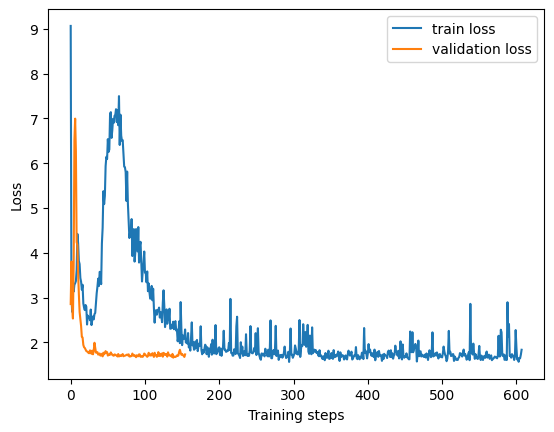

In [56]:
# 5. Plot the fine-tuning loss and MAKE SURE TO SAVE IT AND SUBMIT IT

# plot training losses on x axis
fig = plt.figure()
plt.plot(losses[:608],label='train loss')### YOUR CODE HERE ####)
plt.plot(test_losses, label='validation loss')
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.legend()
# fig.savefig(f'loss_commonsenseqa_gpt2_x{torch.randint(100, (1, )).item()}.png', dpi=fig.dpi)

In [57]:
# print a few predictions on the eval dataset to see what the model predicts

# construct a list of questions without the ground truth label
# and compare prediction of the model with the ground truth

def construct_test_samples(example):
    """
    Helper for converting input examples which have 
    a separate qquestion, labels, answer options
    into a single string for testing the model.

    Arguments
    ---------
    example: dict
        Sample input from the dataset which contains the 
        question, answer labels (e.g. A, B, C, D),
        the answer options for the question, and which 
        of the answers is correct.
    
    Returns
    -------
    input_text: str, str
        Tuple: Formatted test text which contains the question,
        the forwatted answer options (e.g., 'A. <option 1> B. <option 2>' etc); 
        the ground truth answer label only.
    """

    answer_options_list = list(zip(
        example["choices"]["label"],
        example["choices"]["text"]
    ))
    # join each label and text with . and space
    answer_options = ['. '.join(y) for y in answer_options_list] ### YOUR CODE HERE ####
    # join the list of options with spaces into single string
    answer_options_string = ' '.join(answer_options) ### YOUR CODE HERE ####
    # combine question and answer options
    input_text = example["question"] + " " + answer_options_string
    # create the test input text which should be:
    # the input text, followed by the string "Answer: "
    # we don't need to append the ground truth answer since we are creating test inputs
    # and the answer should be predicted.
    input_text += "\nAnswer: " ### YOUR CODE HERE ####

    return input_text, example["answerKey"]

test_samples = [construct_test_samples(dataset["validation"][i]) for i in range(20)]
test_samples[0]

('A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york\nAnswer: ',
 'A')

In [58]:
test_samples

[('A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york\nAnswer: ',
  'A'),
 ('What do people aim to do at work? A. complete job B. learn from each other C. kill animals D. wear hats E. talk to each other\nAnswer: ',
  'A'),
 ('Where would you find magazines along side many other printed works? A. doctor B. bookstore C. market D. train station E. mortuary\nAnswer: ',
  'B'),
 ('Where are  you likely to find a hamburger? A. fast food restaurant B. pizza C. ground up dead cows D. mouth E. cow carcus\nAnswer: ',
  'A'),
 ('James was looking for a good place to buy farmland.  Where might he look? A. midwest B. countryside C. estate D. farming areas E. illinois\nAnswer: ',
  'A'),
 ('What island country is ferret popular? A. own home B. north carolina C. great britain D. hutch E. outdoors\nAnswer: ',
  'C'),
 ("In what Spanish speaking North American country can you get a great

## after finetuning

In [59]:
# Test the model 

# set it to evaluation mode
model.eval()

predictions = []
for sample in test_samples:
    input_text = sample[0]
    input_ids = tokenizer(input_text, return_tensors="pt").to(device)
    output = model.generate(
        input_ids.input_ids,
        attention_mask = input_ids.attention_mask,
        max_new_tokens=1,
        do_sample=True,
        temperature=0.4,
    )
    prediction = tokenizer.decode(output[0], skip_special_tokens=True)
    print(prediction, '\n---')
    predictions.append((input_text, prediction, sample[1]))

# print("Predictions of trained model ", predictions)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york
Answer:  C 
---
What do people aim to do at work? A. complete job B. learn from each other C. kill animals D. wear hats E. talk to each other
Answer:  E 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Where would you find magazines along side many other printed works? A. doctor B. bookstore C. market D. train station E. mortuary
Answer:  D 
---
Where are  you likely to find a hamburger? A. fast food restaurant B. pizza C. ground up dead cows D. mouth E. cow carcus
Answer:  C 
---
James was looking for a good place to buy farmland.  Where might he look? A. midwest B. countryside C. estate D. farming areas E. illinois
Answer:  E 
---
What island country is ferret popular? A. own home B. north carolina C. great britain D. hutch E. outdoors
Answer:  E 
---
In what Spanish speaking North American country can you get a great cup of coffee? A. mildred's coffee shop B. mexico C. diner D. kitchen E. canteen
Answer:  E 
---
What do animals do when an enemy is approaching? A. feel pleasure B. procreate C. pass water D. listen to each other E. sing
Answer:  C 
---
Reading newspaper one of many ways to practice your what? A. literacy B. knowing how to read C. money D. buying E. money bank
Answer

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If you want harmony, what is something you should try to do with the world? A. take time B. make noise C. make war D. make peace E. make haste
Answer:  A 
---
Where does a heifer's master live? A. farm house B. barnyard C. stockyard D. slaughter house E. eat cake
Answer:  E 
---
Aside from water and nourishment what does your dog need? A. bone B. charm C. petted D. lots of attention E. walked
Answer:  B 
---
Janet was watching the film because she liked what? A. erection B. laughter C. being entertained D. fear E. bordem
Answer:  E 
---
What are you waiting alongside with when you're in a reception area? A. motel B. chair C. hospital D. people E. hotels
Answer:  A 
---
When drinking booze what can you do to stay busy? A. reach tentative agreement B. stay in bed C. stop bicycle D. examine thing E. suicide
Answer:  C 
---
A fencing thrust with a sharp sword towards a person would result in what? A. injury B. small cuts C. fever D. competition E. puncture wound
Answer:  E 
---
Unlike a sp

## Before finetuning

In [51]:
# Test the model 

# set it to evaluation mode
model.eval()

predictions = []
for sample in test_samples:
    input_text = sample[0]
    input_ids = tokenizer(input_text, return_tensors="pt").to(device)
    output = model.generate(
        input_ids.input_ids,
        attention_mask = input_ids.attention_mask,
        max_new_tokens=2,
        do_sample=True,
        temperature=0.4,
    )
    prediction = tokenizer.decode(output[0], skip_special_tokens=True)
    print(prediction, '\n---')
    predictions.append((input_text, prediction, sample[1]))

# print("Predictions of trained model ", predictions)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york
Answer:  I 
---
What do people aim to do at work? A. complete job B. learn from each other C. kill animals D. wear hats E. talk to each other
Answer:  If 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Where would you find magazines along side many other printed works? A. doctor B. bookstore C. market D. train station E. mortuary
Answer:  It 
---
Where are  you likely to find a hamburger? A. fast food restaurant B. pizza C. ground up dead cows D. mouth E. cow carcus
Answer:  I 
---
James was looking for a good place to buy farmland.  Where might he look? A. midwest B. countryside C. estate D. farming areas E. illinois
Answer:  In 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


What island country is ferret popular? A. own home B. north carolina C. great britain D. hutch E. outdoors
Answer:  The 
---
In what Spanish speaking North American country can you get a great cup of coffee? A. mildred's coffee shop B. mexico C. diner D. kitchen E. canteen
Answer:  The 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


What do animals do when an enemy is approaching? A. feel pleasure B. procreate C. pass water D. listen to each other E. sing
Answer:  I 
---
Reading newspaper one of many ways to practice your what? A. literacy B. knowing how to read C. money D. buying E. money bank
Answer:  I 
---
What do people typically do while playing guitar? A. cry B. hear sounds C. singing D. arthritis E. making music
Answer:  If 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


What would vinyl be an odd thing to replace? A. pants B. record albums C. record store D. cheese E. wallpaper
Answer:  I 
---
If you want harmony, what is something you should try to do with the world? A. take time B. make noise C. make war D. make peace E. make haste
Answer:  The 
---
Where does a heifer's master live? A. farm house B. barnyard C. stockyard D. slaughter house E. eat cake
Answer:  A 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Aside from water and nourishment what does your dog need? A. bone B. charm C. petted D. lots of attention E. walked
Answer:  The 
---
Janet was watching the film because she liked what? A. erection B. laughter C. being entertained D. fear E. bordem
Answer:  And 
---
What are you waiting alongside with when you're in a reception area? A. motel B. chair C. hospital D. people E. hotels
Answer:  You 
---
When drinking booze what can you do to stay busy? A. reach tentative agreement B. stay in bed C. stop bicycle D. examine thing E. suicide
Answer:  I 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


A fencing thrust with a sharp sword towards a person would result in what? A. injury B. small cuts C. fever D. competition E. puncture wound
Answer:  The 
---
Unlike a spider and his many sight seers, people only have what? A. tongues B. names C. brains D. feelings E. two eyes
Answer:  The 
---
Where do adults use glue sticks? A. classroom B. desk drawer C. at school D. office E. kitchen drawer
Answer:  ( 
---


Questions:
> 1. Provide a brief description of the CommonsenseQA dataset. What kind of task was it developed for, what do the single columns contain?
> 2. What loss function is computed for this training? Provide the name of the function (conceptual, not necessarily the name of a function in the code).
> 3. Given your loss curve, do you think your model will perform well on answering common sense questions? (Note: there is no single right answer; you need to interpret your specific plot)
> 4. Inspect the predictions above. On how many test questions did the model predict the right answer? Compute the accuracy.

## questions to ask:
- why the tensors are packed into 3d/4d tensors in the batch, i.e., why did I have to `squeeze` the input tensors to remove the middle redundant dimension? it was not the case in the last sheet.
- by-word tokenization and do we consider <bos> and <eos> tokens for the theoretical problem?
- is this loss computation: `loss = torch.nn.CrossEntropyLoss()(logits[:, -2, :], targets[:, -1]) ### YOUR CODE HERE ####` correct or what they expected us to do?
- since GPT2 is a decoder only model, it is not actually suitable directly for classification models! why did they give it then?
- What is the difference between this model and AutoModelForSequenceClassification models? Do they have different architectures or one extra head?
- `tokenizer.pad_token = tokenizer.eos_token # set padding side to be left because we are doing causal LM`, why the pad token is used as the eos token, and why did you pad it to the left? in what other situation you would pad it to the right?
tokenizer.padding_side = "left"
- how to freeze during finetuning?
- **computing accuracy**: polina said need to match the generated answer key to the actual answer key (the intention of the task was to do everything in a generative fashion, i,e., not additionally using a classification head!)